In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl

sys.path.insert(0, '..')
from context.nd_array.nd_array.normalize_2d_array import normalize_2d_array
from context.plot.plot.plot_distribution import plot_distribution
from context.fit_skew_t_pdf import fit_skew_t_pdf
from context.fit_skew_t_pdfs import fit_skew_t_pdfs
from context.compute_context import compute_context
from context.make_context_matrix_and_summarize_context import *
from context.plot_context import plot_context

In [3]:
feature_x_sample = pd.read_table('compound_x_cell_line.tsv', index_col=0)

feature_x_sample = pd.DataFrame(
    normalize_2d_array(feature_x_sample.values, '-0-', None, ignore_na=True),
    index=feature_x_sample.index,
    columns=feature_x_sample.columns)

feature_x_sample = feature_x_sample.loc[[
    'ML162',
    'ML210',
    'erastin',
    '1S,3R-RSL-3',
    'PLX-4720',
    'RITA',
    'ouabain',
]]

feature_x_sample

,22RV1_PROSTATE,2313287_STOMACH,253J_URINARY_TRACT,253JBV_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,639V_URINARY_TRACT,647V_URINARY_TRACT,769P_KIDNEY,786O_KIDNEY,...,WM983B_SKIN,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
ML162,-1.038191,-0.729734,NaN,NaN,-2.343076,-2.104530,0.649849,-1.923438,-2.138638,-2.759535,...,-0.474240,0.546465,-0.161970,-0.127650,-0.925910,-2.306086,-2.320873,-0.890742,0.474011,-2.504380
ML210,-0.828458,0.594344,-1.034378,2.691683,-2.317145,-2.342821,1.103213,-0.345858,-1.869034,-2.323289,...,0.051154,0.282920,0.587988,0.818484,-0.128073,-2.318967,-2.256216,-0.096295,-0.068755,-2.212490
erastin,0.343510,0.440115,-0.133158,NaN,0.605784,-0.810662,0.546041,-0.647959,0.283344,0.442234,...,0.970170,-0.736937,-0.192476,0.307495,0.745606,-1.053869,-0.357721,0.522737,1.715891,0.564684
"1S,3R-RSL-3",-1.596762,-1.202165,-2.319009,0.818484,-2.902747,-2.247530,0.098609,-2.120842,-2.317314,-3.002742,...,-0.727616,0.016834,-0.763207,-0.576353,-1.451177,-3.116591,-2.569673,-1.003871,-0.270438,-2.909993
PLX-4720,0.436302,0.679508,0.622308,NaN,0.552397,0.075729,1.170582,1.126517,0.719760,0.601123,...,-1.254705,0.654510,0.345205,0.396473,0.701541,0.564261,0.672305,1.063809,1.077367,0.634172
RITA,-0.083584,1.252781,NaN,0.794332,0.667221,-0.139937,1.434550,-0.330181,-0.453902,-0.081466,...,0.688830,1.282440,1.122280,-1.364868,0.603241,0.687135,0.408337,0.269362,-0.993702,-3.067526
ouabain,-3.230187,-2.989056,-4.027981,-4.400078,-2.582935,-3.289971,-2.411504,-3.936376,-1.755482,-2.642042,...,-3.460767,-2.835675,-4.135983,-2.833768,-3.903284,-0.668297,-3.835576,-3.483986,-0.103922,-1.213605


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


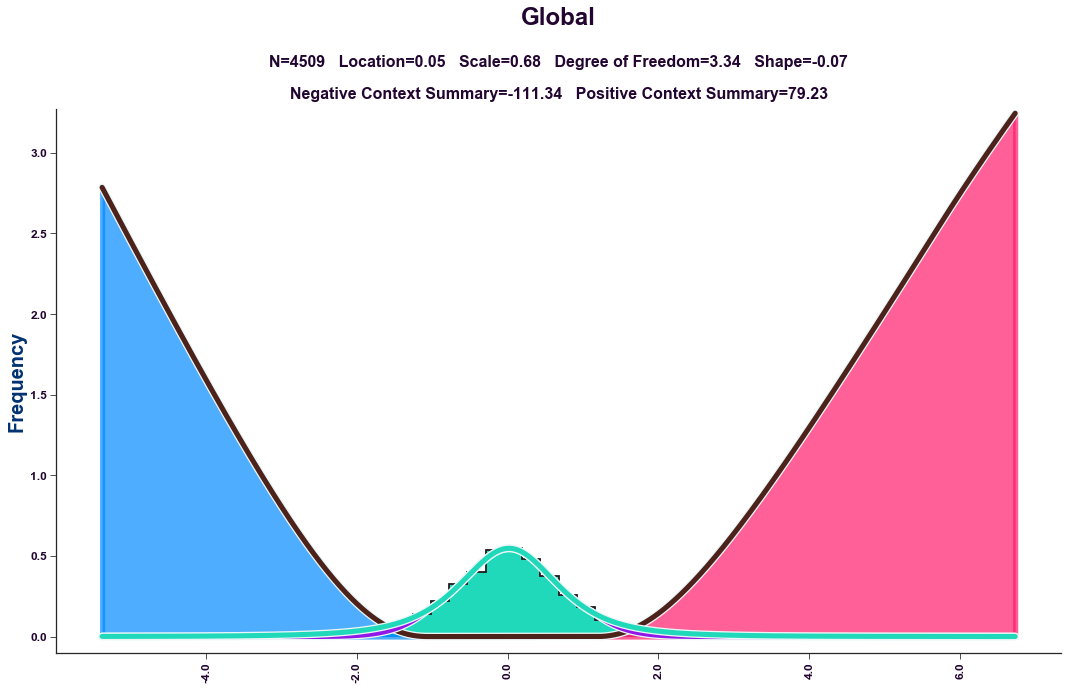

In [13]:
global_n, global_location, global_scale, global_degree_of_freedom, global_shape = fit_skew_t_pdf(
    feature_x_sample.values)

plot_context(
    feature_x_sample.unstack().values,
    'Global',
    location=global_location,
    scale=global_scale,
    degree_of_freedom=global_degree_of_freedom,
    shape=global_shape,
    plot_swarm=False)

In [5]:
array_1d = feature_x_sample.iloc[0]

n, location, scale, df, shape = fit_skew_t_pdf(array_1d)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

n, location, scale, df, shape = fit_skew_t_pdf(
    array_1d, fit_fixed_location=10, fit_fixed_scale=10)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


N=645	Location=-1.958	Scale=1.202	DF=98551.967	Shape=0.720
N=645	Location=10.000	Scale=10.000	DF=20977298.351	Shape=-24882044.885


In [6]:
context_dict = compute_context(array_1d)

for key, value in context_dict.items():
    print('=' * 80)
    print(key)
    print(value)
    if value is not None:
        print(value.shape)

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


fit
[  6.45000000e+02  -1.95793695e+00   1.20191516e+00   9.85519673e+04
   7.19722866e-01]
(5,)
grid
[-4.47448083 -4.47255189 -4.47062295 ...,  1.30654706  1.30847599
  1.31040493]
(3000,)
pdf
[ 0.00488795  0.00491542  0.00494303 ...,  0.0161836   0.01611432
  0.01604529]
(3000,)
r_pdf_reference
[ 0.00488795  0.00491542  0.00494303 ...,  0.01137333  0.01131638
  0.01125968]
(3000,)
r_context_indices
[ -2.38738450e-03  -2.38587159e-03  -2.38435867e-03 ...,   2.73091281e+00
   2.73489293e+00   2.73887137e+00]
(3000,)
s_pdf_reference
None
s_context_indices
None
context_indices
[ -2.38738450e-03  -2.38587159e-03  -2.38435867e-03 ...,   2.73091281e+00
   2.73489293e+00   2.73887137e+00]
(3000,)
context_indices_like_array
[  2.10958901e-04   1.15621736e-02   0.00000000e+00   0.00000000e+00
  -7.15610184e-04  -5.28008360e-04   1.35885446e+00  -3.85794074e-04
  -5.55240883e-04  -1.04240046e-03  -1.11199468e-03  -1.72472645e-03
   0.00000000e+00   1.68232402e-05  -1.11290160e-04  -7.30739364e-

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


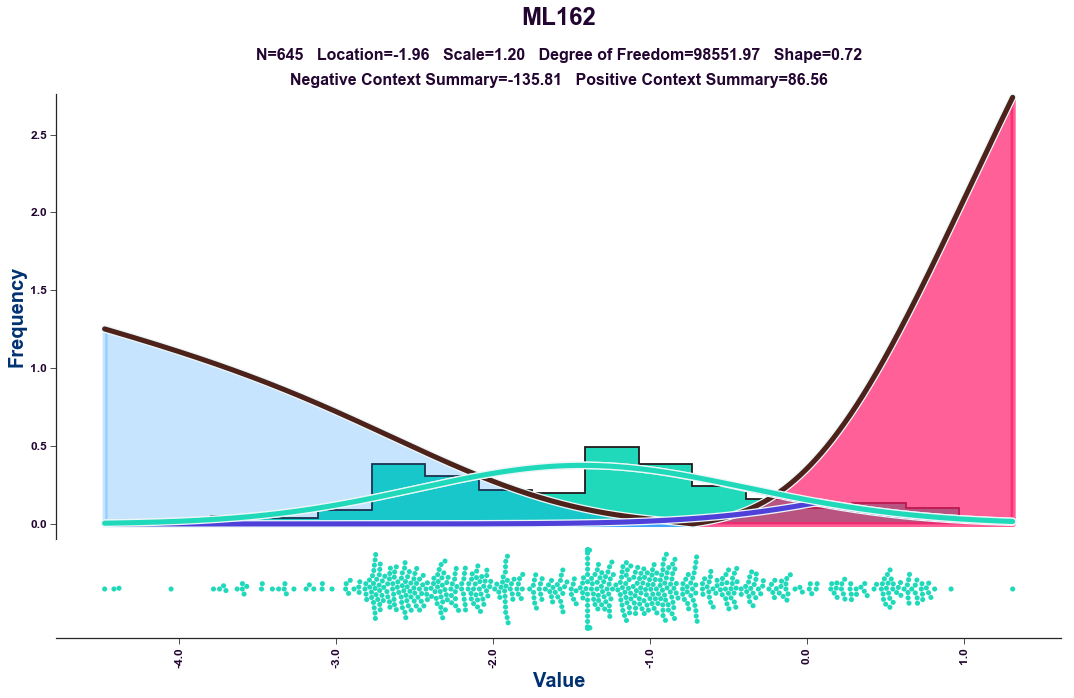

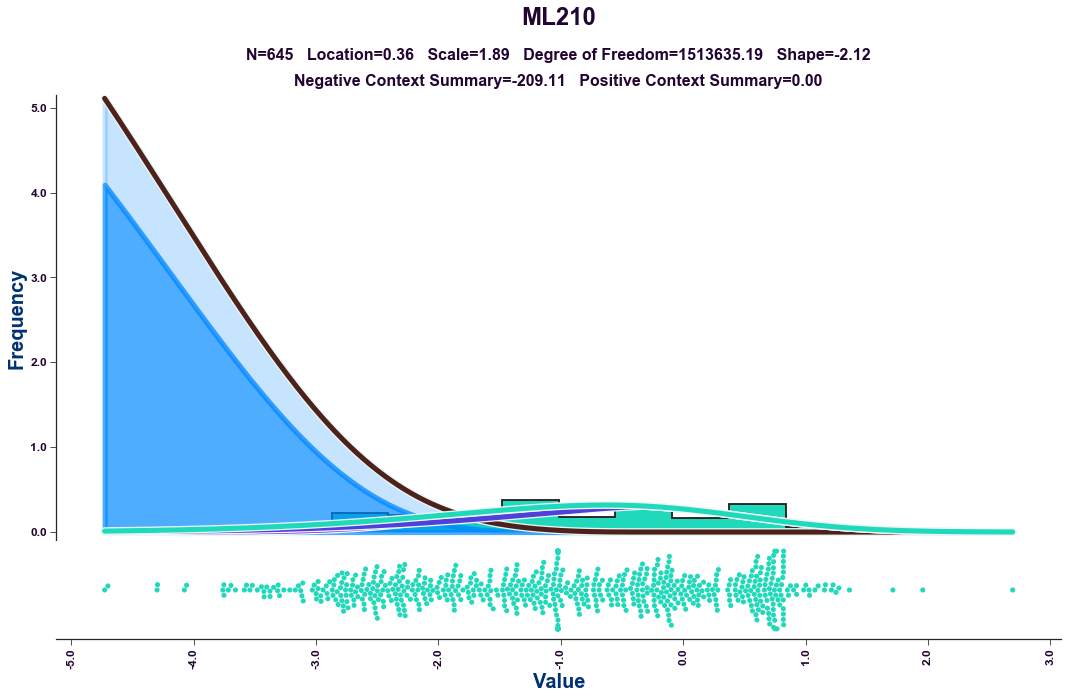

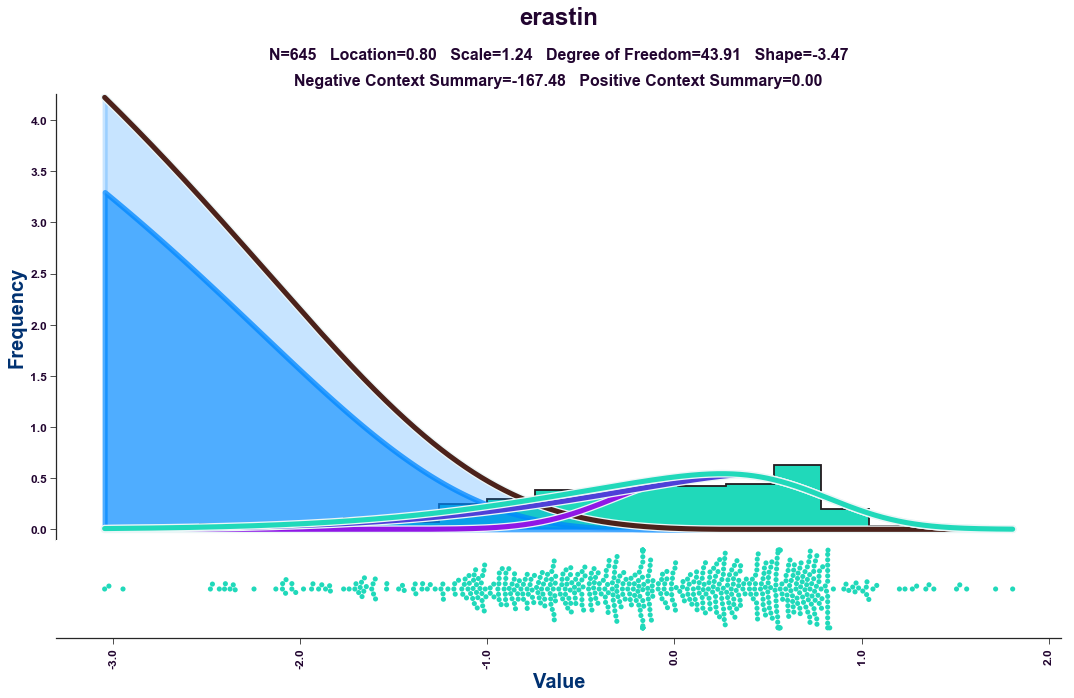

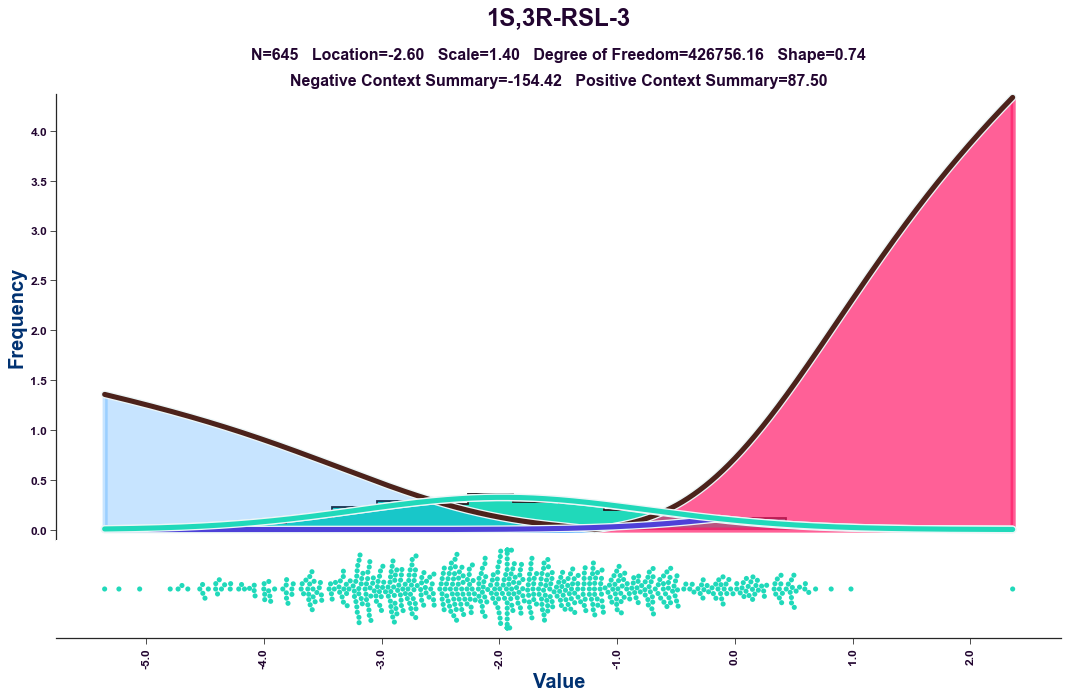

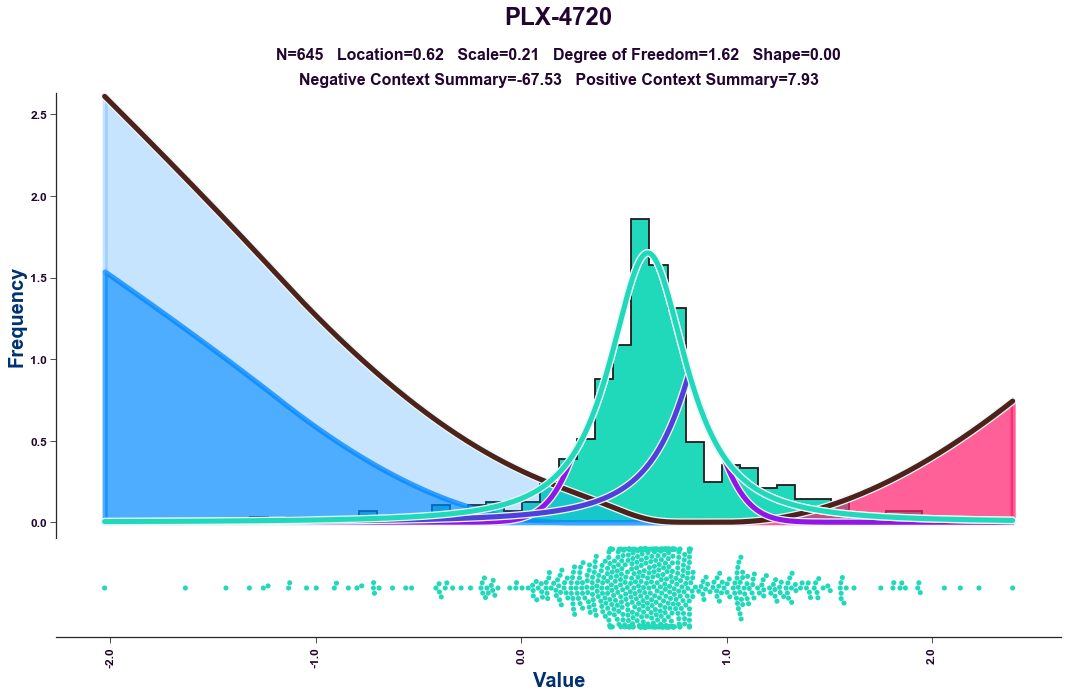

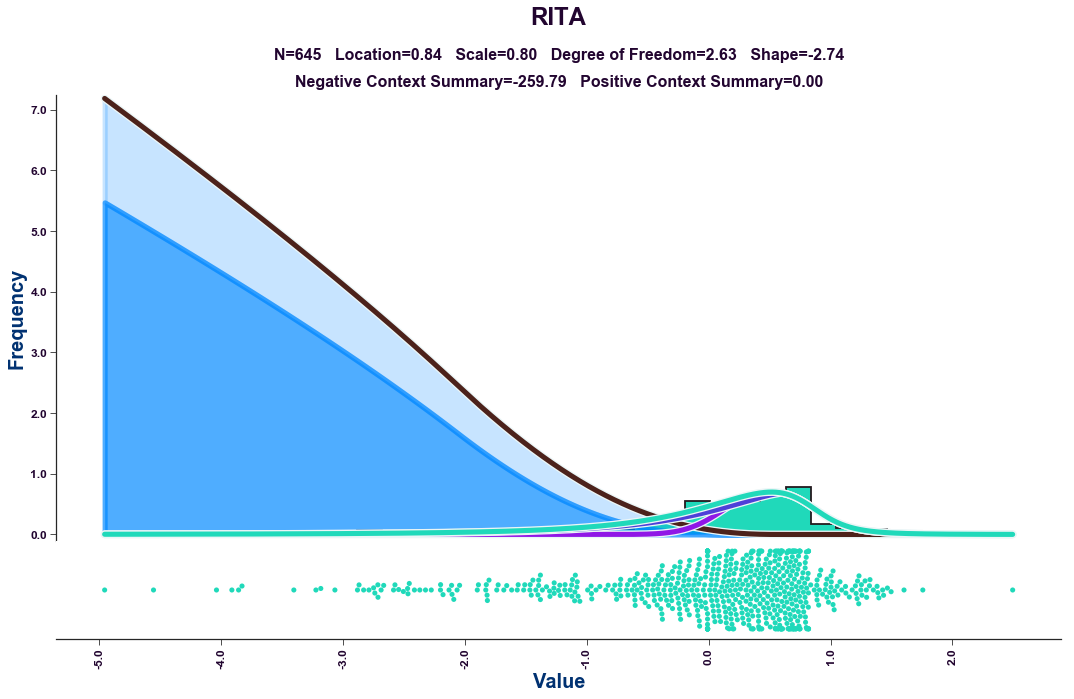

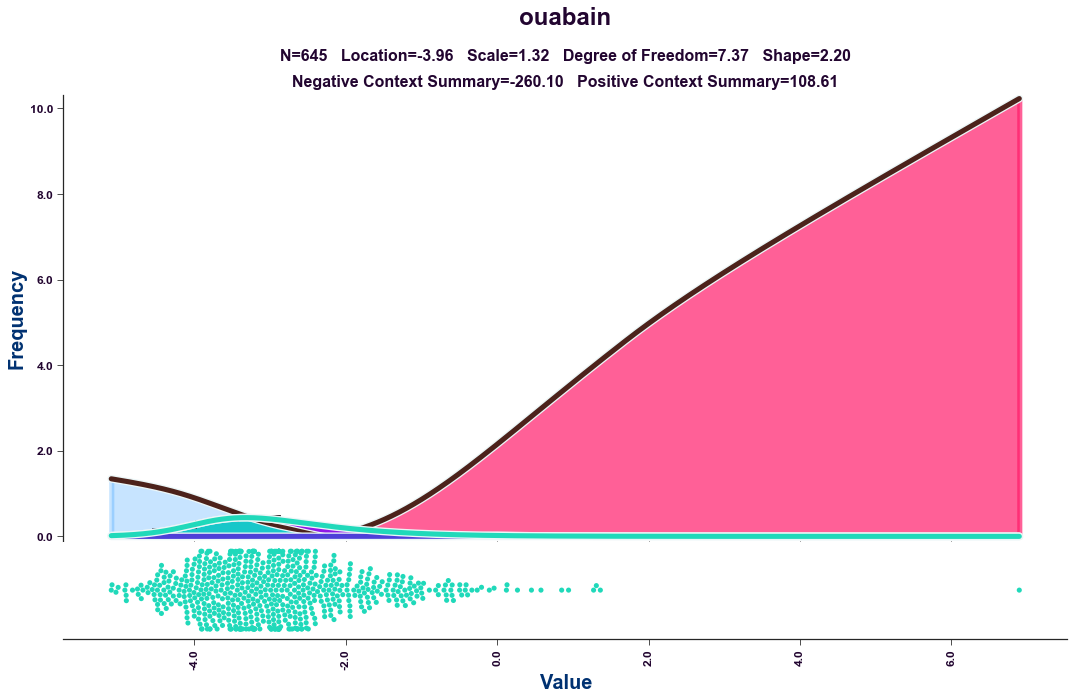

In [7]:
for feature, array_1d in feature_x_sample.iterrows():
    
    plot_context(
        array_1d,
        feature,
        global_location=global_location,
        global_scale=global_scale)
    mpl.pyplot.show()

In [8]:
skew_t_pdf_fit_parameter = fit_skew_t_pdfs(
    feature_x_sample, directory_path='.')

skew_t_pdf_fit_parameter

(1/7) ML162 ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/7) ML210 ...
(3/7) erastin ...
(4/7) 1S,3R-RSL-3 ...
(5/7) PLX-4720 ...
(6/7) RITA ...
(7/7) ouabain ...


,N,Location,Scale,Degree of Freedom,Shape
ML162,645.0,-1.957937,1.201915,9.855197e+04,0.719723
ML210,645.0,0.359200,1.893603,1.513635e+06,-2.118176
erastin,645.0,0.798108,1.235873,4.390728e+01,-3.467866
"1S,3R-RSL-3",645.0,-2.596435,1.403509,4.267562e+05,0.735152
PLX-4720,645.0,0.615406,0.208603,1.620865e+00,0.004694
RITA,645.0,0.844916,0.801026,2.630921e+00,-2.736682
ouabain,645.0,-3.962587,1.316442,7.366850e+00,2.204634


In [9]:
context__feature_x_sample, feature_context_summary = make_context_matrix_and_summarize_context(
    feature_x_sample, directory_path='.')

(1/7) ML162 ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/7) ML210 ...
(3/7) erastin ...
(4/7) 1S,3R-RSL-3 ...
(5/7) PLX-4720 ...
(6/7) RITA ...
(7/7) ouabain ...


In [10]:
context__feature_x_sample

,22RV1_PROSTATE,2313287_STOMACH,253J_URINARY_TRACT,253JBV_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,639V_URINARY_TRACT,647V_URINARY_TRACT,769P_KIDNEY,786O_KIDNEY,...,WM983B_SKIN,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
Feature,,,,,,,,,,,,,,,,,,,,,
ML162,0.000000,0.000090,0.000000,0.000000,-0.000000,-0.000000,1.296617,-0.000000,-0.000000,-0.000000,...,0.022712,1.089575,0.151553,0.174134,0.0,-0.000000,-0.000000,0.000000,0.952055,-0.000000
ML210,-0.000000,0.000000,-0.000053,0.000000,-0.258354,-0.274263,0.000000,0.000000,-0.067196,-0.263062,...,0.000000,0.000000,0.000000,0.000000,0.0,-0.259917,-0.221263,0.000000,0.000000,-0.198177
erastin,0.000000,0.000000,-0.001017,-0.001692,0.000000,-0.126258,0.000000,-0.062953,0.000000,0.000000,...,0.000000,-0.093731,-0.002237,0.000000,0.0,-0.280990,-0.010849,0.000000,0.000000,0.000000
"1S,3R-RSL-3",0.000000,0.000972,-0.000000,1.932131,-0.000000,-0.000000,0.755433,-0.000000,-0.000000,-0.000000,...,0.071079,0.648605,0.059904,0.132907,0.0,-0.000000,-0.000000,0.013262,0.341325,-0.000000
PLX-4720,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.009831,0.011780,0.006775,0.000000,-0.000000,...,-0.828368,0.000000,-0.000000,-0.000000,0.0,-0.000000,0.000000,0.001999,0.002748,0.000000
RITA,-0.011854,0.000000,-0.006473,0.000000,0.000000,-0.017813,0.000000,-0.051462,-0.086022,-0.011854,...,0.000000,0.000000,0.000000,-0.739921,0.0,0.000000,-0.000000,-0.000009,-0.389106,-3.113089
ouabain,0.000000,0.000000,-0.000000,-0.000000,0.008303,0.000000,0.024028,-0.000000,0.235117,0.005163,...,-0.000000,0.000474,-0.000000,0.000474,-0.0,1.252479,-0.000000,-0.000000,2.005235,0.644055


In [11]:
feature_context_summary

,Negative Context Summary,Positive Context Summary
Feature,,
ML162,0.000000,78.526874
ML210,-127.623686,0.000000
erastin,-103.644837,0.000000
"1S,3R-RSL-3",0.000000,77.468252
PLX-4720,-15.579258,7.914153
RITA,-159.688099,0.000000
ouabain,0.000000,112.987060


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


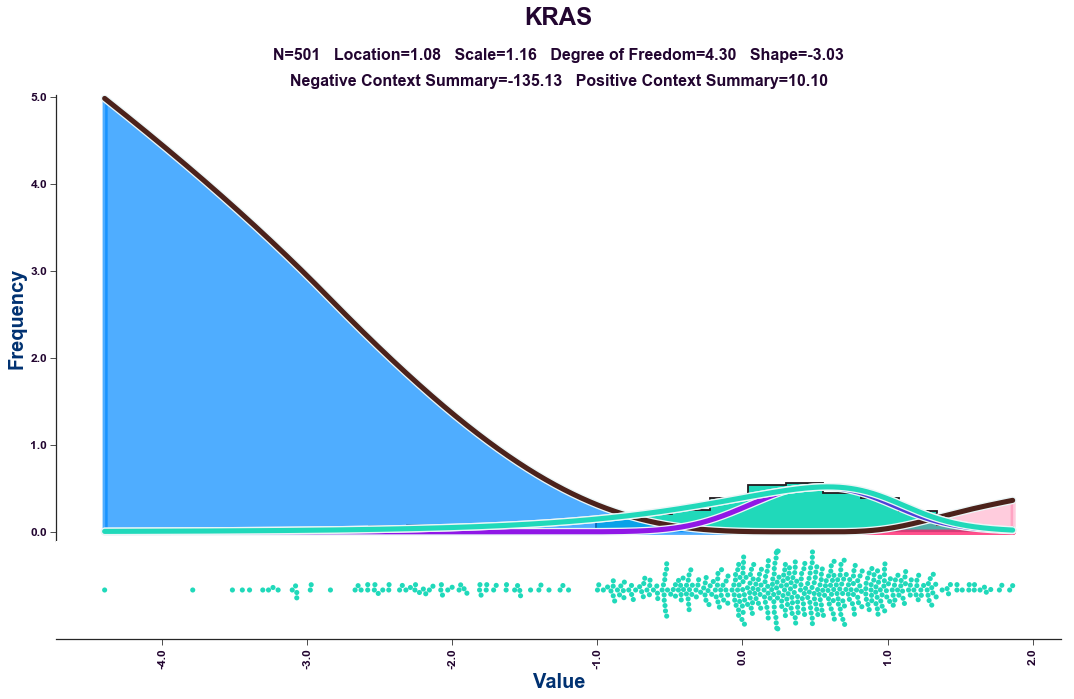

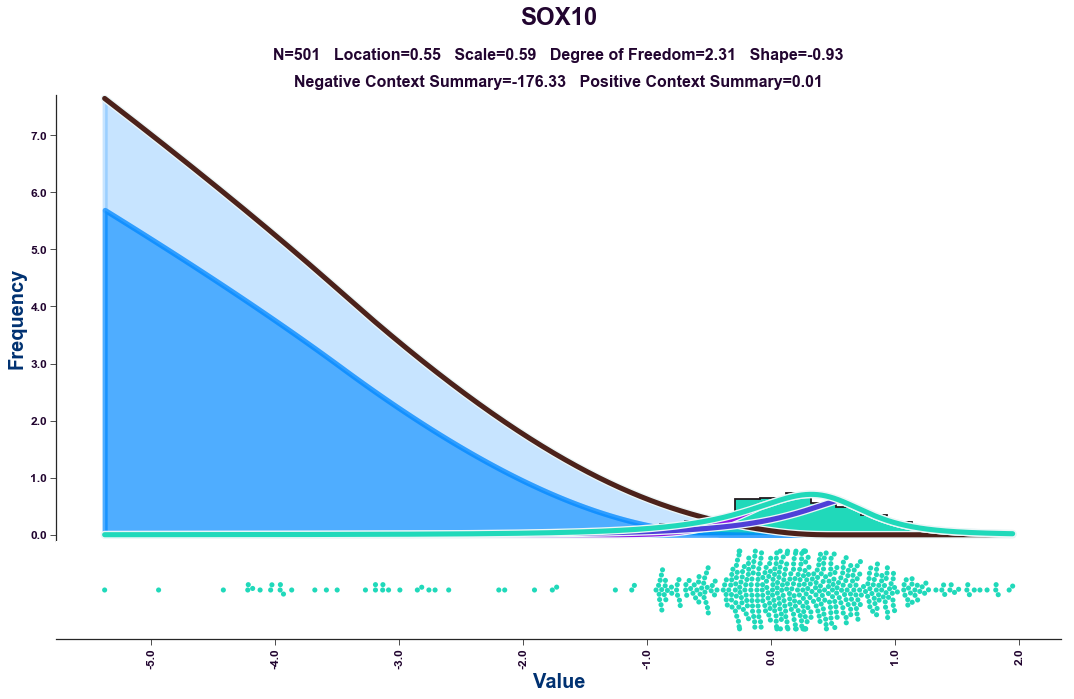

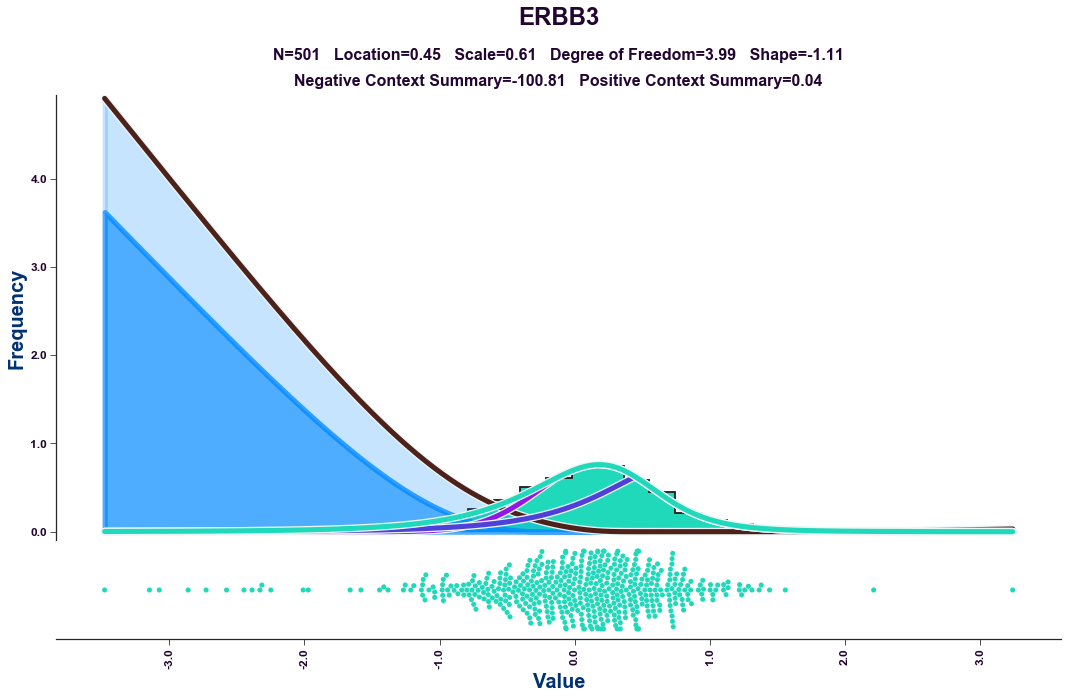

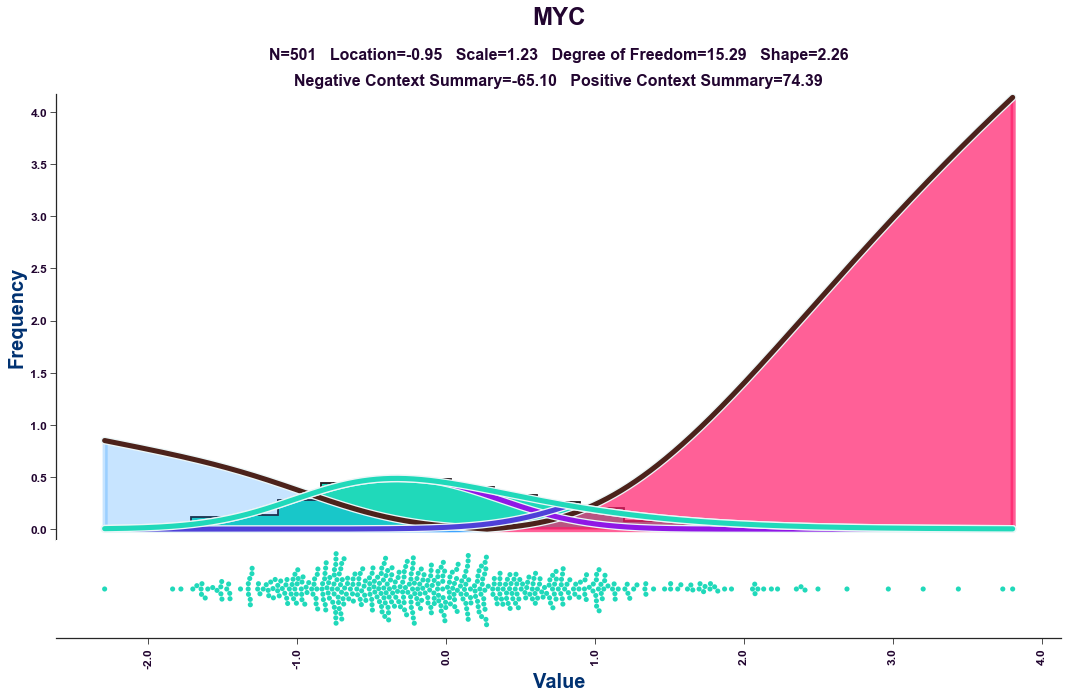

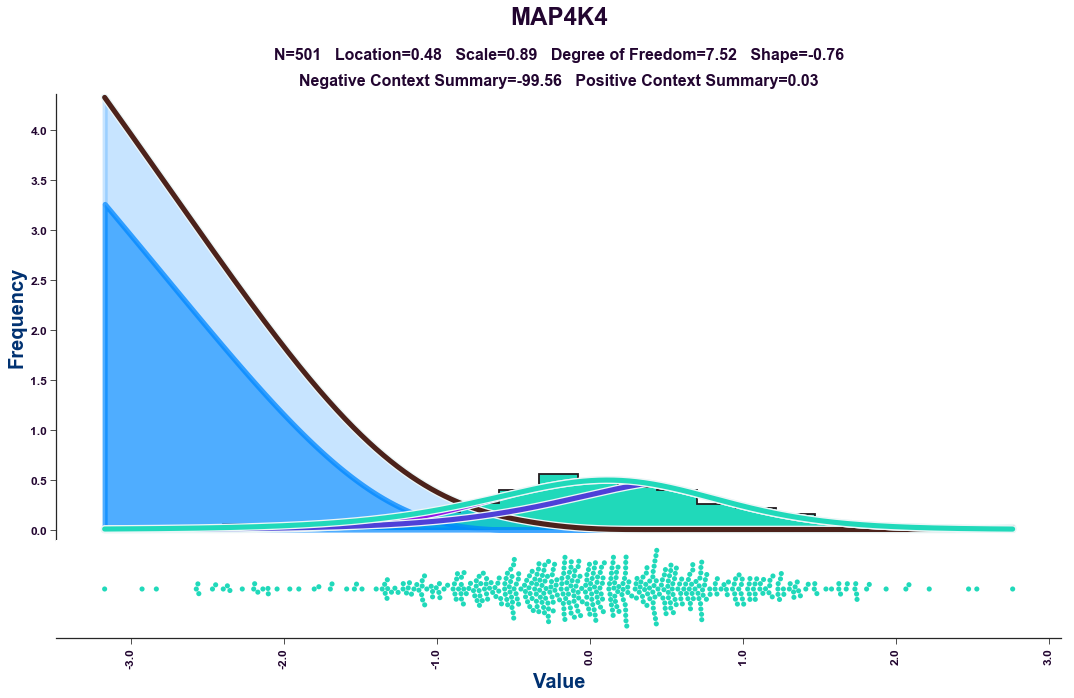

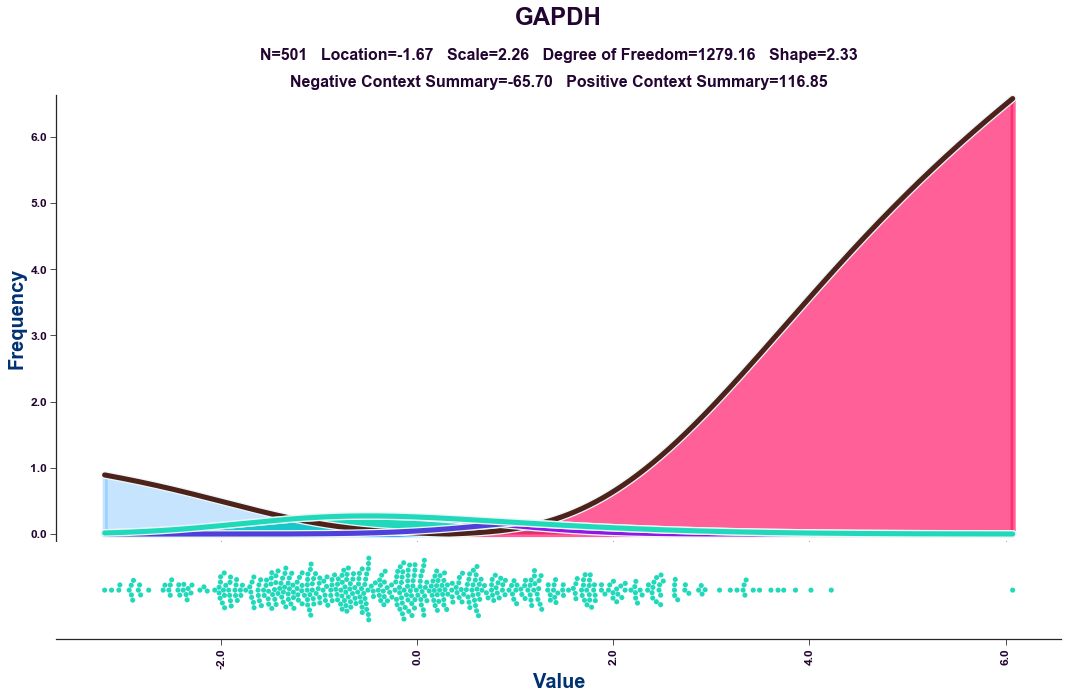

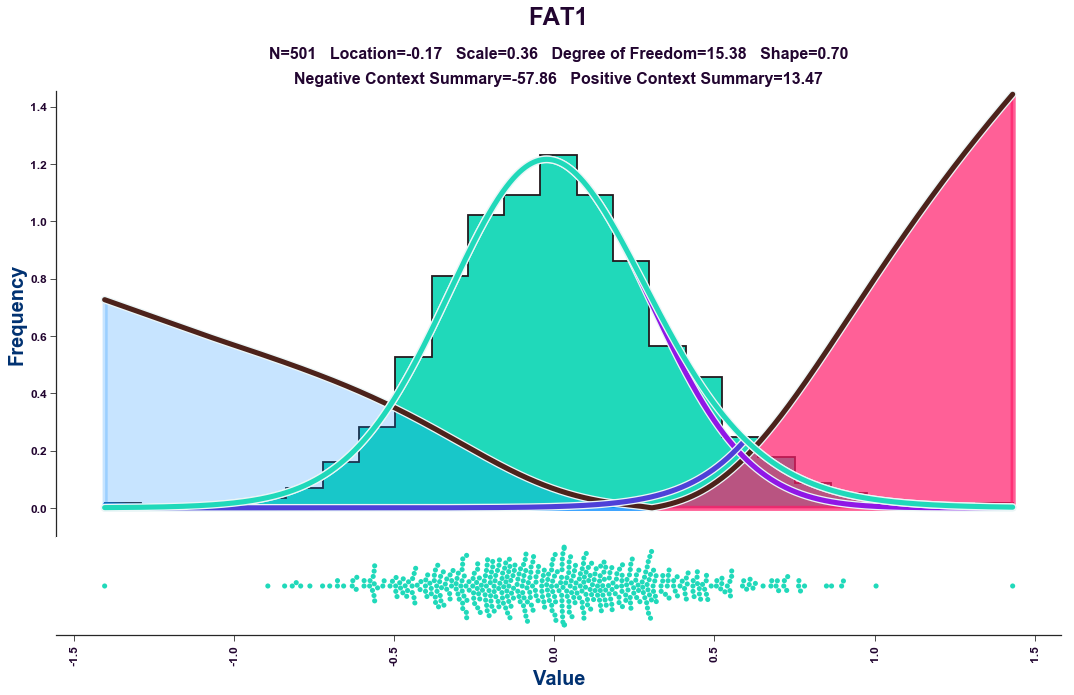

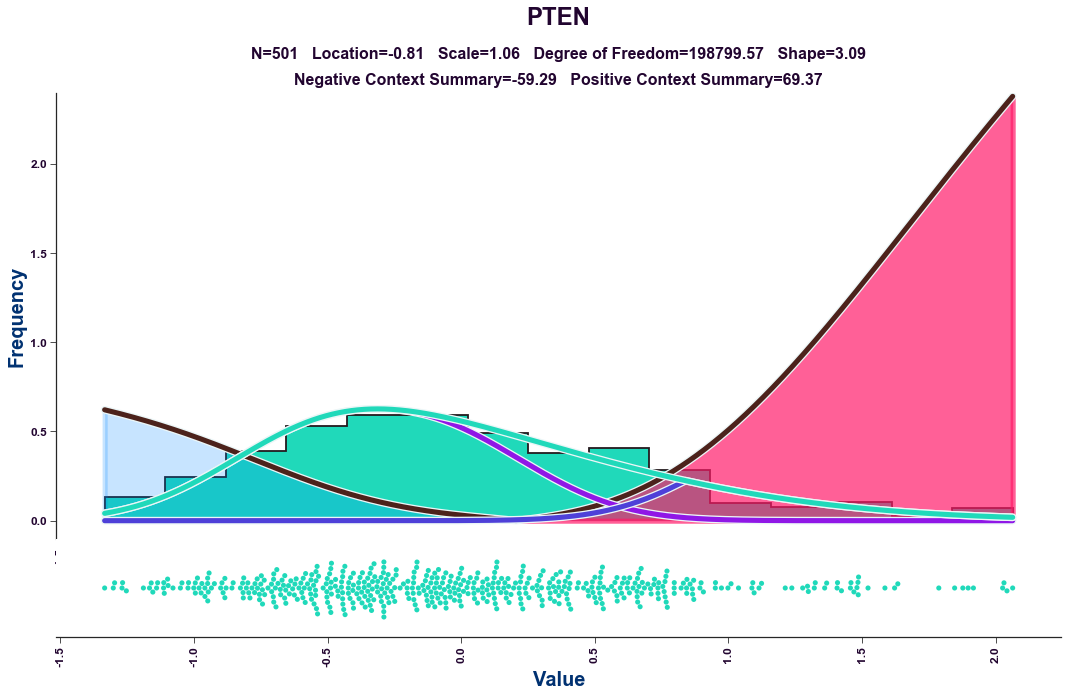

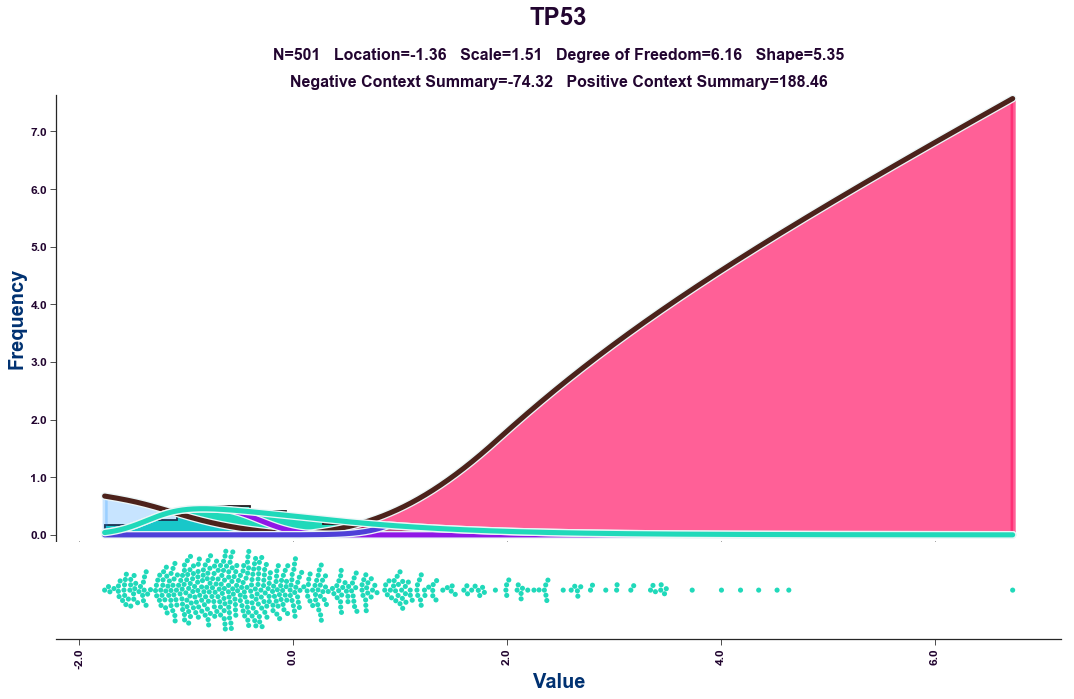

In [12]:
feature_x_sample = pd.read_table('gene_x_cell_line.tsv', index_col=0)

feature_x_sample = pd.DataFrame(
    normalize_2d_array(feature_x_sample.values, '-0-', None),
    index=feature_x_sample.index,
    columns=feature_x_sample.columns)

for feature, array_1d in feature_x_sample.iterrows():
    
    plot_context(
        array_1d,
        feature,
        global_location=global_location,
        global_scale=global_scale)
    mpl.pyplot.show()